# Connect with Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Install YOLOv8

* yolov8 github: https://github.com/ultralytics/ultralytics

* yolov8 docs: https://docs.ultralytics.com/quickstart/

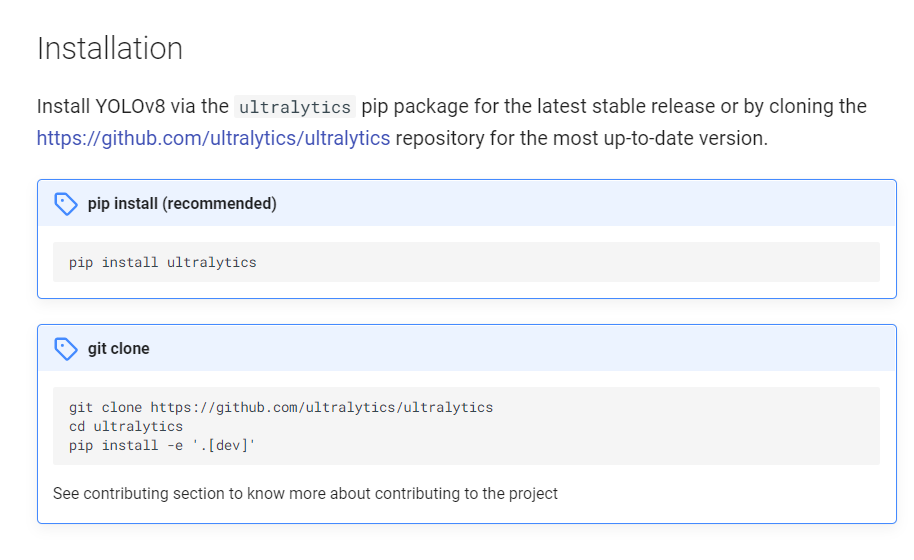


In [2]:
# Pip install (recommended)

!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 911.4/911.4 kB 21.4 MB/s eta 0:00:00


In [3]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.66 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 31.1/112.6 GB disk)


# **Training YOLO8 for Object Detection**

* **task=** detect or segment
* **mode=** train, val
* **model=** path to model file, i.e. yolov8n.pt, yolov8n.yaml
* **data=** path to data file dataset.yaml
* **epochs=** number of epochs to train for
* **imgsz=** size of input images as integer
* **batch=** number of images per batch
* **project=** project traing results saving path
* **name=** experiment name


In the provided code, the backslash ('\') is used to continue the command onto the next line for better readability. This is called line continuation.

In Python, a backslash at the end of a line indicates that the command continues on the next line. It's commonly used when a single line of code becomes too long and you want to split it into multiple lines for improved readability.

In [4]:
!yolo task=detect \
    mode=train \
    model=yolov8n.pt \
    data=/content/drive/MyDrive/ObjectDetection/FootballPlayerDetection/dataset.yaml \
    epochs=10 \
    imgsz=1920 \
    batch=5 \
    project=/content/drive/MyDrive/ObjectDetection/FootballPlayerDetection/TrainingResults \
    name=footballDetection

100% 6.25M/6.25M [00:00<00:00, 105MB/s]
Ultralytics 8.3.66 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/ObjectDetection/FootballPlayerDetection/dataset.yaml, epochs=10, time=None, patience=100, batch=5, imgsz=1920, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/ObjectDetection/FootballPlayerDetection/TrainingResults, name=footballDetection, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=Fal

# Inference using trained YOLO8

**Prediction to Detect the Test Images**

In [7]:
!yolo task=detect \
    mode=predict \
    model=/content/drive/MyDrive/ObjectDetection/FootballPlayerDetection/TrainingResults/footballDetection/weights/best.pt \
    conf=0.55 \
    source=/content/drive/MyDrive/ObjectDetection/FootballPlayerDetection/Dataset/test/images

Ultralytics 8.3.66 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs

image 1/146 /content/drive/MyDrive/ObjectDetection/FootballPlayerDetection/Dataset/test/images/08fd33_0_mp4-10_jpg.rf.0955a950bbe84886790fd36798248863.jpg: 1088x1920 1 Ball, 21 Players, 3 Referees, 33.4ms
image 2/146 /content/drive/MyDrive/ObjectDetection/FootballPlayerDetection/Dataset/test/images/08fd33_0_mp4-26_jpg.rf.538dc3be8ff16d7fac0bf539698abb77.jpg: 1088x1920 20 Players, 2 Referees, 24.6ms
image 3/146 /content/drive/MyDrive/ObjectDetection/FootballPlayerDetection/Dataset/test/images/08fd33_0_mp4-28_jpg.rf.3a4c1bc5a6b527a7c19c1908a5df73aa.jpg: 1088x1920 21 Players, 2 Referees, 24.7ms
image 4/146 /content/drive/MyDrive/ObjectDetection/FootballPlayerDetection/Dataset/test/images/08fd33_0_mp4-2_jpg.rf.992311fb905c1e25061f89c7919c713c.jpg: 1088x1920 22 Players, 3 Referees, 24.6ms
image 5/146 /content/drive/MyDrive/Object

In [8]:
!cp -r /content/runs/detect/predict /content/drive/MyDrive/ObjectDetection/FootballPlayerDetection/DetectionResults/

**Prediction on Vidoes to Detect Objects**

In [12]:
!yolo task=det!yolo task=detect \
    mode=predict \
    model=/content/drive/MyDrive/ObjectDetection/FootballPlayerDetection/TrainingResults/footballDetection/weights/best.pt \
    conf=0.75 \
    source=/content/drive/MyDrive/ObjectDetection/FootballPlayerDetection/TestVideosect mode=predict model=/content/drive/MyDrive/ObjectDetection/FootballPlayerDetection/TrainingResults/footballDetection/weights/best.pt conf=0.75 source=/content/drive/MyDrive/ObjectDetection/FootballPlayerDetection/Dataset/TestVideos

Ultralytics 8.3.66 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs

video 1/2 (frame 1/1088) /content/drive/MyDrive/ObjectDetection/FootballPlayerDetection/Dataset/TestVideos/Messi.mp4: 1088x1920 12 Players, 48.9ms
video 1/2 (frame 2/1088) /content/drive/MyDrive/ObjectDetection/FootballPlayerDetection/Dataset/TestVideos/Messi.mp4: 1088x1920 12 Players, 25.6ms
video 1/2 (frame 3/1088) /content/drive/MyDrive/ObjectDetection/FootballPlayerDetection/Dataset/TestVideos/Messi.mp4: 1088x1920 12 Players, 1 Referee, 24.7ms
video 1/2 (frame 4/1088) /content/drive/MyDrive/ObjectDetection/FootballPlayerDetection/Dataset/TestVideos/Messi.mp4: 1088x1920 12 Players, 1 Referee, 24.6ms
video 1/2 (frame 5/1088) /content/drive/MyDrive/ObjectDetection/FootballPlayerDetection/Dataset/TestVideos/Messi.mp4: 1088x1920 13 Players, 1 Referee, 24.6ms
video 1/2 (frame 6/1088) /content/drive/MyDrive/ObjectDetection/Foot

In [13]:
!cp -r /content/runs/detect/predict2 /content/drive/MyDrive/ObjectDetection/FootballPlayerDetection/DetectionResults/

#Deploy YOLO8
** Export the trained YOLO8 Model **





In [14]:
!yolo mode=export \
    model=/content/drive/MyDrive/ObjectDetection/FootballPlayerDetection/TrainingResults/footballDetection/weights/best.pt \
    format=coreml


Ultralytics 8.3.66 🚀 Python-3.11.11 torch-2.5.1+cu121 CPU (Intel Xeon 2.00GHz)
Model summary (fused): 168 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from '/content/drive/MyDrive/ObjectDetection/FootballPlayerDetection/TrainingResults/footballDetection/weights/best.pt' with input shape (1, 3, 1920, 1920) BCHW and output shape(s) (1, 7, 75600) (6.2 MB)
requirements: Ultralytics requirement ['coremltools>=7.0'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 61.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 265.3 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 4.2s, installed 1 package: ['coremltools>=7.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

scikit-learn version 1.6.0 is not supported. Minimum required version: 0.17. Maximum required version: 1.5.1. Disabling scikit-learn conversion API.
XGBoost version 2.1.3 has not been tested with coremlt